In [1]:
# data operation libraries
import numpy as np
import pandas as pd

# importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# for datetime operations
import datetime as dt

In [2]:
# import the dataset 
data = pd.read_csv('data/Global_Superstore2.csv', encoding='windows-1252')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
# correcting 'Order Date' variable
data[['order_d', 'order_m', 'order_y']] = data['Order Date'].str.split('-', expand=True)
data['Order Date'] = data['order_y'] + '/' + data['order_m'] + '/' + data['order_d']
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [5]:
# correcting 'Ship Date' variable
data[['ship_d', 'ship_m', 'ship_y']] = data['Ship Date'].str.split('-', expand=True)
data['Ship Date'] = data['ship_y'] + '/' + data['ship_m'] + '/' + data['ship_d']
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [6]:
# dropping the support columns
data.drop(columns=['order_d', 'order_m', 'order_y', 'ship_d', 'ship_m', 'ship_y'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [8]:
# let's check out the columns which are suitable category column type 
data.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [9]:
data['Ship Mode'] = data['Ship Mode'].astype('category')
data['Segment'] = data['Segment'].astype('category')
data['Country'] = data['Country'].astype('category')
data['Market'] = data['Market'].astype('category')
data['Region'] = data['Region'].astype('category')
data['Category'] = data['Category'].astype('category')
data['Sub-Category'] = data['Sub-Category'].astype('category')
data['Order Priority'] = data['Order Priority'].astype('category')

In [10]:
# check the reduction in memory consumption
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  category      
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  category      
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  category      
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  category      
 13  Region          51290 non-null  category      
 14  Product ID      51290 non-null  object        
 15  Ca

In [11]:
# making sure neither of our category columns have leading spaces
def remove_leading_spaces(df):
    for cols in df.columns:
        if df[cols].dtypes in ['object', 'category']:
            df[cols] = df[cols].str.strip()
        return df

In [12]:
data = remove_leading_spaces(data)

In [13]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [14]:
# generating years from our 'Order_Year' variable because we are going 
# to need this in future analysis
data['Order_Year'] = data['Order Date'].dt.year

In [15]:
# total unique customer count
print('Number of unique customers made purchase in 2011: {}' .format(data[data['Order_Year']==2011]['Customer Name'].nunique()))
print('Number of unique customers made purchase in 2011: {}' .format(data[data['Order_Year']==2012]['Customer Name'].nunique()))
print('Number of unique customers made purchase in 2011: {}' .format(data[data['Order_Year']==2013]['Customer Name'].nunique()))
print('Number of unique customers made purchase in 2011: {}' .format(data[data['Order_Year']==2014]['Customer Name'].nunique()))

Number of unique customers made purchase in 2011: 795
Number of unique customers made purchase in 2011: 795
Number of unique customers made purchase in 2011: 795
Number of unique customers made purchase in 2011: 794


In [16]:
def total_purchase_in_year(row):
    Order_Year = row[24]
    if Order_Year in [2011, 2012, 2013]:
        return 795
    else:
        return 794
    
# generating 'unique_customers_within_year' based on associated year value
# for that particular row
data['unique_customers_within_year'] = data.apply(total_purchase_in_year, axis='columns')

## Sales Revenue
### Revenue = Price x Units Sold

In [17]:
# Generating 'Revenue' column
data['Revenue'] = data['Sales'] * data['Quantity']

# EDA
Solving the questions

### Customers Analysis
#### 1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer
#### 2. Do the high frequent customers are contributing more revenue
#### 3. Are they also profitable - what is the profit margin across the buckets
#### 4. Which customer segment is most profitable in each year.
#### 5. How the customers are distributed across the countries

In [18]:
# 1. Profile the customers based on their frequency of purchase - calculate 
# frequency of purchase for each customer
purchase_frequency = data.groupby(['Order_Year', 'Customer Name']).agg({'Customer Name':'count', 
                                                                       'unique_customers_within_year':'min',
                                                                       'Revenue': 'sum',
                                                                       'Profit': 'sum'})
purchase_frequency

Customer Name  unique_customers_within_year  \
Order_Year Customer Name                                                     
2011       Aaron Bergman                  14                           795   
           Aaron Hawkins                  15                           795   
           Aaron Smayling                  8                           795   
           Adam Bellavance                 6                           795   
           Adam Hart                      19                           795   
...                                      ...                           ...   
2014       Xylona Preis                   13                           794   
           Yana Sorensen                  20                           794   
           Yoseph Carroll                 13                           794   
           Zuschuss Carroll               28                           794   
           Zuschuss Donatelli             14                           794   

                                   Revenue      Profit  
Order_Year Customer Name                                
2011       Aaron Bergman        2693.78200   189.26450  
           Aaron Hawkins       47418.92150  1528.25570  
           Aaron Smayling      12117.70000   180.54020  
           Adam Bellavance      9210.63210   370.65270  
           Adam Hart           25909.57552   322.34912  
...                                    ...         ...  
2014       Xylona Preis        13240.71500   210.67240  
           Yana Sorensen       47494.72200  2175.74250  
           Yoseph Carroll      27667.53400   549.72100  
           Zuschuss Carroll    24306.65600   960.92900  
           Zuschuss Donatelli   8581.31970   468.34770  

[3179 rows x 4 columns]

In [19]:
purchase_frequency.rename(mapper={'Customer Name': 'Purchase_during_year'}, axis=1, inplace=True)

In [20]:
purchase_frequency

Purchase_during_year  \
Order_Year Customer Name                              
2011       Aaron Bergman                         14   
           Aaron Hawkins                         15   
           Aaron Smayling                         8   
           Adam Bellavance                        6   
           Adam Hart                             19   
...                                             ...   
2014       Xylona Preis                          13   
           Yana Sorensen                         20   
           Yoseph Carroll                        13   
           Zuschuss Carroll                      28   
           Zuschuss Donatelli                    14   

                               unique_customers_within_year      Revenue  \
Order_Year Customer Name                                                   
2011       Aaron Bergman                                795   2693.78200   
           Aaron Hawkins                                795  47418.92150   
           Aaron Smayling                               795  12117.70000   
           Adam Bellavance                              795   9210.63210   
           Adam Hart                                    795  25909.57552   
...                                                     ...          ...   
2014       Xylona Preis                                 794  13240.71500   
           Yana Sorensen                                794  47494.72200   
           Yoseph Carroll                               794  27667.53400   
           Zuschuss Carroll                             794  24306.65600   
           Zuschuss Donatelli                           794   8581.31970   

                                   Profit  
Order_Year Customer Name                   
2011       Aaron Bergman        189.26450  
           Aaron Hawkins       1528.25570  
           Aaron Smayling       180.54020  
           Adam Bellavance      370.65270  
           Adam Hart            322.34912  
...                                   ...  
2014       Xylona Preis         210.67240  
           Yana Sorensen       2175.74250  
           Yoseph Carroll       549.72100  
           Zuschuss Carroll     960.92900  
           Zuschuss Donatelli   468.34770  

[3179 rows x 4 columns]

####  Repeat Purchase Rate (RPR) 
The repeat purchase rate is a calculation that shows you the percentage of your current customer base that has purchased at least a second time in a specific duration (usally take 365 days). This metric is influenced by your customer retention efforts and is a good indicator of the value you are providing your customers.
![Image](https://blog.smile.io/content/images/2020/05/How-to-Calculate-Purchase-Frequency---RPR-equation.png)

In [21]:
purchase_frequency['Customer_purchase_frequency'] = purchase_frequency['Purchase_during_year'] / purchase_frequency['unique_customers_within_year'] *100

In [22]:
# Answer:
purchase_frequency.head()

Purchase_during_year  \
Order_Year Customer Name                           
2011       Aaron Bergman                      14   
           Aaron Hawkins                      15   
           Aaron Smayling                      8   
           Adam Bellavance                     6   
           Adam Hart                          19   

                            unique_customers_within_year      Revenue  \
Order_Year Customer Name                                                
2011       Aaron Bergman                             795   2693.78200   
           Aaron Hawkins                             795  47418.92150   
           Aaron Smayling                            795  12117.70000   
           Adam Bellavance                           795   9210.63210   
           Adam Hart                                 795  25909.57552   

                                Profit  Customer_purchase_frequency  
Order_Year Customer Name                                             
2011       Aaron Bergman     189.26450                     1.761006  
           Aaron Hawkins    1528.25570                     1.886792  
           Aaron Smayling    180.54020                     1.006289  
           Adam Bellavance   370.65270                     0.754717  
           Adam Hart         322.34912                     2.389937

In [23]:
# 2. Do the high frequent customers are contributing more revenue
df_2 = purchase_frequency.reset_index()
df_2.head()

,Order_Year,Customer Name,Purchase_during_year,unique_customers_within_year,Revenue,Profit,Customer_purchase_frequency
0,2011,Aaron Bergman,14,795,2693.78200,189.26450,1.761006
1,2011,Aaron Hawkins,15,795,47418.92150,1528.25570,1.886792
2,2011,Aaron Smayling,8,795,12117.70000,180.54020,1.006289
3,2011,Adam Bellavance,6,795,9210.63210,370.65270,0.754717
4,2011,Adam Hart,19,795,25909.57552,322.34912,2.389937


In [24]:
group_object = df_2.groupby(['Order_Year'])

In [25]:
frequency_df = pd.DataFrame(columns=df_2.columns)

In [26]:
for g,d in group_object:
    highest_freq_customers = d.nlargest(1, 'Customer_purchase_frequency')
    frequency_df = pd.concat([frequency_df, highest_freq_customers])

In [27]:
def highlight_cols(x):
    df = x.copy()
    df.loc[:, ['Customer Name', 'Customer_purchase_frequency']] = 'background-color: pink'
    df[['Order_Year', 'Purchase_during_year', 'unique_customers_within_year', 'Revenue', 'Profit']] = 'background-color:grey'
    return df

In [28]:
display(frequency_df.style.apply(highlight_cols, axis = None))

,Order_Year,Customer Name,Purchase_during_year,unique_customers_within_year,Revenue,Profit,Customer_purchase_frequency
210,2011,David Philippe,31,795,37504.175040,247.489920,3.899371
1433,2012,Rob Dowd,42,795,41813.193100,1482.860300,5.283019
2194,2013,Pete Kriz,47,795,33062.639000,328.075600,5.911950
3075,2014,Shahid Collister,49,794,74150.276580,1636.835020,6.171285


In [29]:
rev_df = pd.DataFrame(columns=df_2.columns)

In [30]:
for g,d in group_object:
    highest_rev_customers = d.nlargest(1, 'Revenue')
    rev_df = pd.concat([rev_df, highest_rev_customers])

In [31]:
def highlight_cols(x):
    df = x.copy()
    df.loc[:, ['Customer Name', 'Revenue']] = 'background-color: pink'
    df[['Order_Year', 'Purchase_during_year', 'unique_customers_within_year', 'Profit', 'Customer_purchase_frequency']] = 'background-color:grey'
    return df

In [32]:
display(rev_df.style.apply(highlight_cols, axis=None))

,Order_Year,Customer Name,Purchase_during_year,unique_customers_within_year,Revenue,Profit,Customer_purchase_frequency
687,2011,Sean Miller,15,795,158047.509000,-901.745700,1.886792
1481,2012,Sean Christensen,21,795,115865.898000,994.162000,2.641509
1596,2013,Adrian Barton,15,795,136078.958000,4843.389200,1.886792
3142,2014,Tom Ashbrook,23,794,140379.010000,5371.299700,2.896725


#### Answer:
We can clearly see that neither of the high purchase frequency customers are there in the high revenue generating customer table.
#####  ---> The answer is no. high purchase frequency customers aren't contributing to high revenue.  

In [33]:
# 3. Are they also profitable - what is the profit margin across the buckets
profit_df = pd.DataFrame(columns=df_2.columns)

In [34]:
for g, d in group_object:
    highest_profit = d.nlargest(1, 'Profit')
    profit_df = pd.concat([profit_df, highest_profit])

In [35]:
def highlight_cols(x):
    df = x.copy()
    df.loc[:, ['Customer Name', 'Profit']] = 'background-color: pink'
    df[['Order_Year', 'Purchase_during_year', 'unique_customers_within_year', 'Revenue', 'Customer_purchase_frequency']] = 'background-color:grey'
    return df

In [36]:
display(profit_df.style.apply(highlight_cols, axis=None))

,Order_Year,Customer Name,Purchase_during_year,unique_customers_within_year,Revenue,Profit,Customer_purchase_frequency
672,2011,Sanjit Chand,18,795,76791.853000,5733.372000,2.264151
1337,2012,Mike Gockenbach,13,795,88443.941600,4839.418200,1.635220
2321,2013,Tamara Chand,23,795,109272.976000,8536.494300,2.893082
3007,2014,Raymond Buch,22,794,70156.140000,7444.534300,2.770781


#### Answer:
--> From this table, we can see that neither of the customers who were in high purchase frequency or high revenue table are in the high profitable customer table. May be these are the customers wwho are purchasing low quantity but the profit margin is higher on their purchase 

In [37]:
# 4. Which customer segment is most profitable in each year
segment_group = data.groupby(['Order_Year', 'Segment'])

In [38]:
high_profit_df = segment_group.agg({'Profit':'sum'}).unstack()
high_profit_df

Profit                            
Segment         Consumer     Corporate   Home Office
Order_Year                                          
2011        117337.49406   84746.93574   46856.38174
2012        165799.19094   90556.69992   51059.38824
2013        208427.73398  125707.93908   72799.55712
2014        257675.36308  140196.75392  106293.85346

In [39]:
high_profit_df.style.background_gradient(cmap='Spectral', subset=pd.IndexSlice[:, pd.IndexSlice[:,'Consumer']])

#### Answer:
Every year consumer segment is triggering more profit to the firm

In [40]:
# 5. How the customers are distributed across the countries
customer_distribution = data.groupby(by=['Country'], as_index=False)['Customer ID'].count()
customer_distribution.rename(columns = {'Customer ID': 'Customer_count'}, inplace=True)
customer_distribution

,Country,Customer_count
0,Afghanistan,55
1,Albania,16
2,Algeria,196
3,Angola,122
4,Argentina,390
...,...,...
142,Venezuela,194
143,Vietnam,265
144,Yemen,30
145,Zambia,102


In [45]:
country_map = dict(type='choropleth',
                   locations=customer_distribution['Country'],
                  locationmode = 'country names',
                  z=customer_distribution['Customer_count'],
                  reversescale = True,
                  text=customer_distribution['Country'],
                  colorscale='earth',
                  colorbar={'title':'Customer Count'})
layout = dict(title='Customer Distribution over Countries',
             geo=dict(showframe=False, projection={'type':'mercator'}))

In [46]:
choromap = go.Figure(data=[country_map], layout=layout)
choromap

### Product Analysis
1. Which country has top sales?

2. Which are the top 5 profit-making product types on a yearly basis

3. How is the product price varying with sales - Is there any increase in sales with the decrease in price at a day level

4. What is the average delivery time across the counties - bar plot

In [85]:
# 1. Which country has top sales 
country_sales = data.groupby(by='Country', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
country_sales

,Country,Sales
139,United States,2.297201e+06
6,Australia,9.252359e+05
44,France,8.589311e+05
26,China,7.005620e+05
47,Germany,6.288400e+05
...,...,...
127,Tajikistan,2.427840e+02
75,Macedonia,2.096400e+02
40,Eritrea,1.877400e+02
5,Armenia,1.567500e+02


#### Answer: 
United States has top sales. Let's plot top 10 sales countries

In [122]:
top_10_sales = country_sales.head(10)
top_10_sales


,Country,Sales
139,United States,2.297201e+06
6,Australia,9.252359e+05
44,France,8.589311e+05
26,China,7.005620e+05
47,Germany,6.288400e+05
81,Mexico,6.225906e+05
57,India,5.896501e+05
138,United Kingdom,5.285763e+05
58,Indonesia,4.048875e+05
17,Brazil,3.611064e+05


In [126]:
plt.figure(figsize=(15,7))
fig = px.treemap(top_10_sales, path=['Country'], values='Sales',
                title='Top 10 countries sales')
fig.show()

<Figure size 1500x700 with 0 Axes>

In [131]:
# 2. Which are top 5 profit-making product types on a yearly basis
year_subcategory_profit = data.groupby(by=['Order_Year', 'Sub-Category'], as_index=False)['Profit'].sum()
year_subcategory_profit

,Order_Year,Sub-Category,Profit
0,2011,Accessories,15719.8606
1,2011,Appliances,22838.4413
2,2011,Art,10399.0233
3,2011,Binders,11447.2053
4,2011,Bookcases,27518.8575
...,...,...,...
63,2014,Paper,20975.8306
64,2014,Phones,70657.6413
65,2014,Storage,39016.9521
66,2014,Supplies,7365.4090


In [134]:
top5_profit_category = pd.DataFrame(columns=year_subcategory_profit.columns)

In [148]:
category_yearly_profit =  year_subcategory_profit.groupby('Order_Year')
for g, d in category_yearly_profit:
    high_profit_categories = d.nlargest(5, 'Profit')
    top5_profit_category = pd.concat([top5_profit_category, high_profit_categories])

#### Answer:
Top 5 profit making products for each year

In [150]:
top5_profit_category

,Order_Year,Sub-Category,Profit
13,2011,Phones,53927.48950
6,2011,Copiers,30375.09344
5,2011,Chairs,29943.15710
4,2011,Bookcases,27518.85750
1,2011,Appliances,22838.44130
...,...,...,...
57,2014,Copiers,104048.53596
64,2014,Phones,70657.64130
55,2014,Bookcases,63219.05050
52,2014,Appliances,53040.50050


In [151]:
# 3. How is the product price varying with sales - Is there 
# any increase in sales with the decrease in price at a day level
data['Unit_Price'] = data['Sales']/data['Quantity']
data['Order_Day'] = data['Order Date'].dt.day

#### Answer:

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



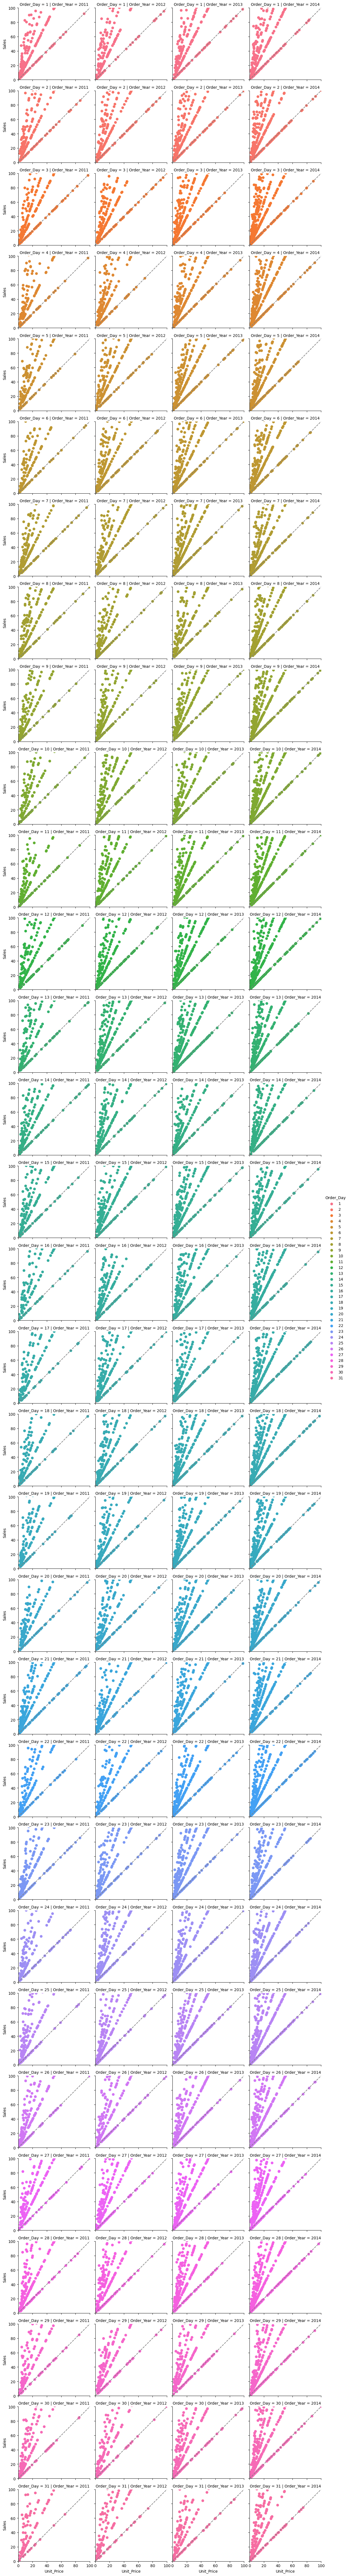

In [152]:
g = sns.FacetGrid(data, row='Order_Day', col='Order_Year', hue='Order_Day')
k = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'Unit_Price', 'Sales')
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c='gray', ls='--')
g.add_legend()

In [155]:
# 4. What is the average delivery time across the countries - bar plot
data['Delivery_Duration'] = data['Ship Date'] - data['Order Date']
delivery_duration_df = data.groupby(by=['Country'], as_index=False)['Delivery_Duration'].mean()
delivery_duration_df['Duration_in_hours'] = delivery_duration_df['Delivery_Duration']/dt.timedelta(hours=1)
delivery_duration_df

,Country,Delivery_Duration,Duration_in_hours
0,Afghanistan,4 days 11:46:54.545454545,107.781818
1,Albania,3 days 15:00:00,87.000000
2,Algeria,3 days 20:26:56.326530612,92.448980
3,Angola,4 days 04:55:04.918032786,100.918033
4,Argentina,3 days 19:48:55.384615384,91.815385
...,...,...,...
142,Venezuela,4 days 06:33:24.123711340,102.556701
143,Vietnam,3 days 19:28:18.113207547,91.471698
144,Yemen,4 days 00:00:00,96.000000
145,Zambia,3 days 21:52:56.470588235,93.882353


In [165]:
top10_sales_country_DD = top_10_sales.merge(delivery_duration_df, how='left', left_index=True, right_index=True)
top10_sales_country_DD.reset_index(inplace=True)
top10_sales_country_DD.sort_values(by=['Duration_in_hours'], inplace=True)
top10_sales_country_DD.drop(columns=['index', 'Country_y'], inplace=True)
top10_sales_country_DD.rename(columns={'Country_x':'Country'}, inplace=True)
top10_sales_country_DD

,Country,Sales,Delivery_Duration,Duration_in_hours
3,China,7.005620e+05,3 days 21:22:12.765957446,93.370213
9,Brazil,3.611064e+05,3 days 21:46:43.001876172,93.778612
2,France,8.589311e+05,3 days 22:39:31.135479306,94.658649
1,Australia,9.252359e+05,3 days 22:39:48.156503348,94.663377
0,United States,2.297201e+06,3 days 23:00:46.828096858,95.013008
5,Mexico,6.225906e+05,3 days 23:18:03.812405446,95.301059
6,India,5.896501e+05,3 days 23:22:57.491961414,95.382637
8,Indonesia,4.048875e+05,3 days 23:36:10.359712230,95.602878
4,Germany,6.288400e+05,4 days 01:45:59.709443099,97.766586
7,United Kingdom,5.285763e+05,4 days 02:29:54.488671157,98.498469


In [178]:
import plotly
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [179]:
top10_sales_country_DD.iplot(kind='bar', x='Country', y='Duration_in_hours',
                            title='Countries and their Average Product Delivery Duration in Hours',
                            xTitle='Countries', 
                            yTitle='AVG Delivery Duration in hours')

In [186]:
fig = px.bar(top10_sales_country_DD, x='Country', y = 'Duration_in_hours',
            title='Countries and their Average Product Delivery Duration in Hours')
fig.update_layout(xaxis_title='Countries', 
                yaxis_title='AVG Delivery Duration in hours')
fig.show()